<center>
    <h1>
        Application de la loi de Benford au contrôle de qualité des modèles numériques de terrain
    </h1>
    
    <h2>
            Authors: FATIHI Ayoub & KECHNA Mehdi 
    </h2>
</center>

### Ce journal est inspiré de ce papier: *[Application de la loi de Benford au contrôle de qualité des modèles numériques de terrain](https://www.researchgate.net/publication/331580669_Application_de_la_loi_de_Benford_au_controle_de_qualite_des_modeles_numeriques_de_terrain)*

<center>
<div>
<img src="img/newcomb_benford.png"  />
</div>
    Simon Newcomb photo from Wikimedia, Public Domain, Frank Benford photo illustration based on an image on (Nigrini.com) in the Public Domain
</center>

---

(Fr) **La loi de Benford**, également appelée **loi de Newcomb-Benford**, **loi des nombres anormaux** ou **loi du premier chiffre**, est une observation sur la distribution de fréquence des chiffres de tête dans de nombreux ensembles de données numériques de la vie réelle. La loi stipule que dans de nombreux ensembles de nombres naturels, le premier chiffre a tendance à être petit. Dans les ensembles qui obéissent à cette loi, le chiffre 1 apparaît comme le premier chiffre significatif environ 30 % du temps, tandis que le chiffre 9 apparaît comme le premier chiffre significatif moins de 5 % du temps. Si les chiffres étaient distribués uniformément, ils apparaîtraient chacun environ 11,1 % du temps. La loi de Benford permet également de prédire la distribution des chiffres de poids fort, des chiffres de poids faible, des combinaisons de chiffres, etc.

---

**Benford's law**, also called the **Newcomb–Benford law**, the **law of anomalous numbers**, or the **first-digit law**, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading digit is likely to be small. In sets that obey the law, the number 1 appears as the leading significant digit about 30 % of the time, while 9 appears as the leading significant digit less than 5 % of the time. If the digits were distributed uniformly, they would each occur about 11.1 % of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on.

[Reference](https://www.wikiwand.com/en/Benford%27s_law)

## Distribution de la loi de Benford
<center>
    <h2>
             Premier chiffre (basé sur log10(x))
    </h2>
</center>
<center>
    
    <img src="img/benford.png" alt="benford line" />
</center>
<center>    
    <h2>
        Distribution de Benford
    </h2>
</center>
<center>  
    <img src="img/Rozklad_benforda.png" alt="benford table" />
    
</center>

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show, show_hist
from sklearn.linear_model import LinearRegression
from scipy import stats
from LNC import *

# Defining help functions
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


# Defining constants for plotting later
font = {'family': 'serif',
        'color':  'gray',
        'weight': 'bold',
        'size': 20
        }
box = {'facecolor': 'none',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }

# Study case 0: DEM of BeniMellal Khenifra Region

In [2]:
# Load DEM
dem = rasterio.open('tifs/demBK.tif')

# Load slope
slp = rasterio.open('tifs/demBK_slope.tif')

# Load aspect 
asp = rasterio.open('tifs/demBK_aspect.tif')

# Load strahler
strhlr = rasterio.open('tifs/demBK_strahler.tif')

## The raster

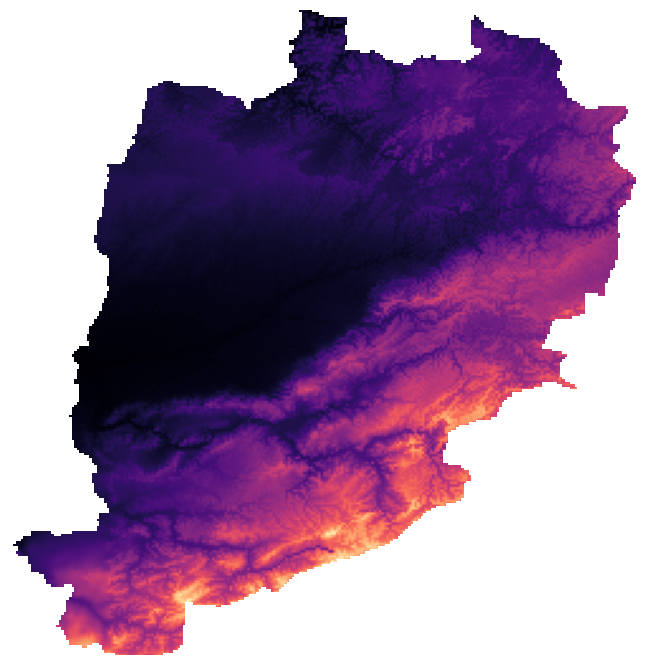

In [3]:
plt.figure(figsize=(15, 12))
plt.axis('off')
show(dem, cmap='magma');

## The histogram

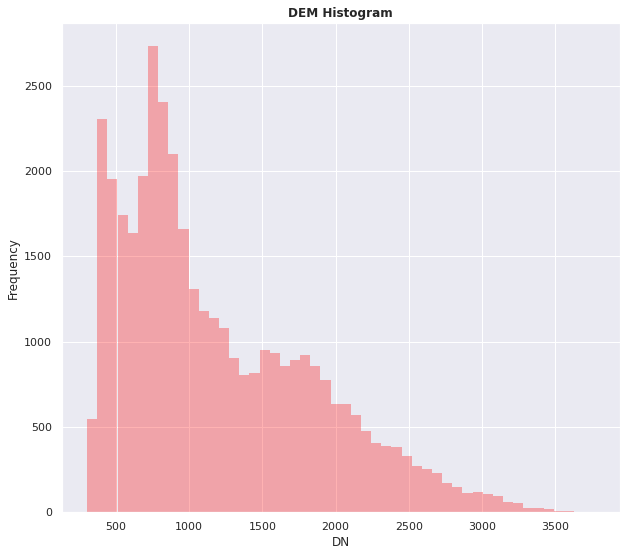

In [4]:
fig, axhist = plt.subplots(1, 1, figsize=(10, 9))

show_hist(dem, bins=50, lw=0.0, stacked=False, 
          alpha=0.3,
          title="DEM Histogram", ax=axhist)
axhist.get_legend().remove()

In [5]:
 print("\nDEM\n")
 print(dem.profile)
 print("\nSLOPE\n")
 print(slp.profile)
 print("\nASPECT\n")
 print(asp.profile)


DEM

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 251, 'height': 258, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.008333333330677291, 0.0, -7.333333333,
       0.0, -0.008333333333333328, 33.483333333), 'tiled': False, 'interleave': 'band'}

SLOPE

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 267, 'height': 258, 'count': 1, 'crs': CRS.from_epsg(32629), 'transform': Affine(759.5900400749064, 0.0, 654847.2322,
       0.0, -943.6139759689934, 3711196.4854), 'tiled': False, 'interleave': 'band'}

ASPECT

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 251, 'height': 258, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00833333333333, 0.0, -7.333333333338395,
       0.0, -0.008333333333329996, 33.483333333335935), 'tiled': False, 'interleave': 'band'}


In [6]:
# Reading the first band (not from zero!) of the dem
band1 = dem.read(1).flatten()

f1 = count_leading_digits(band1)

ff1 = frequency_leading_digits(f1)

print_distribution_leading_digits(f1)

digit | frequency
------|----------
    1 |  35.95
    2 |  12.61
    3 |   4.75
    4 |   8.35
    5 |   6.34
    6 |   6.89
    7 |   9.80
    8 |   8.65
    9 |   6.65


In [7]:
# Reading the first band (not from zero!) of the slope
band2 = slp.read(1).flatten() # 2d array

f2 = count_leading_digits(band2)

ff2 = frequency_leading_digits(f2)

print_distribution_leading_digits(f2)

digit | frequency
------|----------
    1 |  36.57
    2 |  15.11
    3 |  10.47
    4 |   8.99
    5 |   7.53
    6 |   6.65
    7 |   5.58
    8 |   4.88
    9 |   4.22


In [8]:
# Reading the first band (not from zero!) of the aspect
band3 = asp.read(1).flatten() # 2d array

f3 = count_leading_digits(band3)

ff3 = frequency_leading_digits(f3)

print_distribution_leading_digits(f3)

digit | frequency
------|----------
    1 |  31.39
    2 |  30.48
    3 |  27.37
    4 |   2.08
    5 |   1.82
    6 |   1.66
    7 |   1.72
    8 |   1.64
    9 |   1.84


In [9]:
# Reading the first band (not from zero!) of the aspect
band4 = strhlr.read(1).flatten() # 2d array

f4 = count_leading_digits(band4)

ff4 = frequency_leading_digits(f4)

print_distribution_leading_digits(f4)

digit | frequency
------|----------
    1 |  70.70
    2 |  20.13
    3 |   7.70
    4 |   1.43
    5 |   0.03
    6 |   0.00
    7 |   0.00
    8 |   0.00
    9 |   0.00


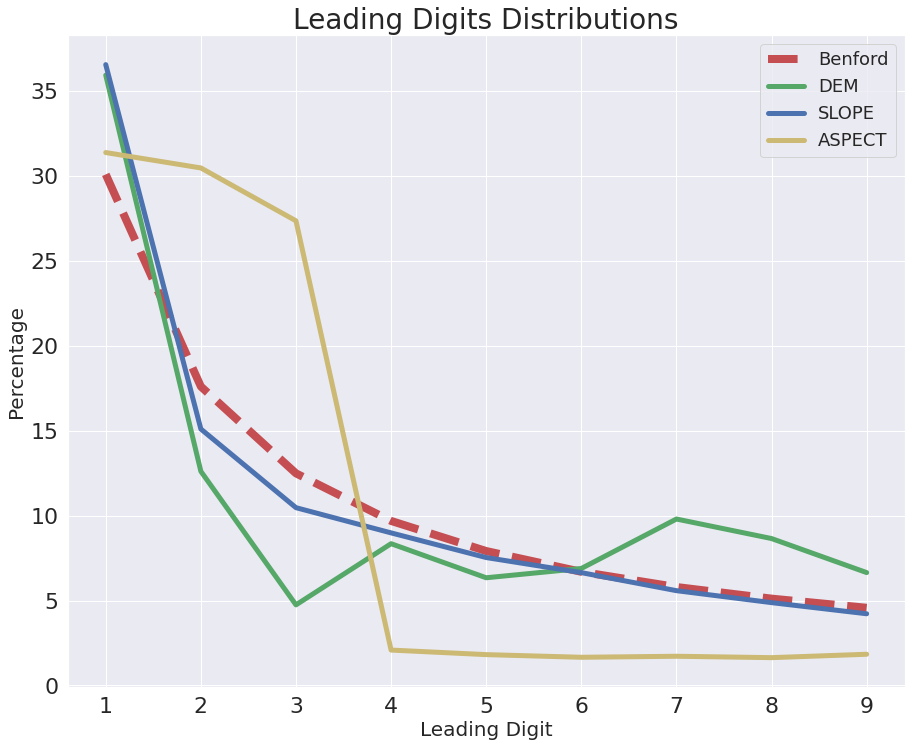

In [10]:
plot_benford(ff1, ff2, ff3);

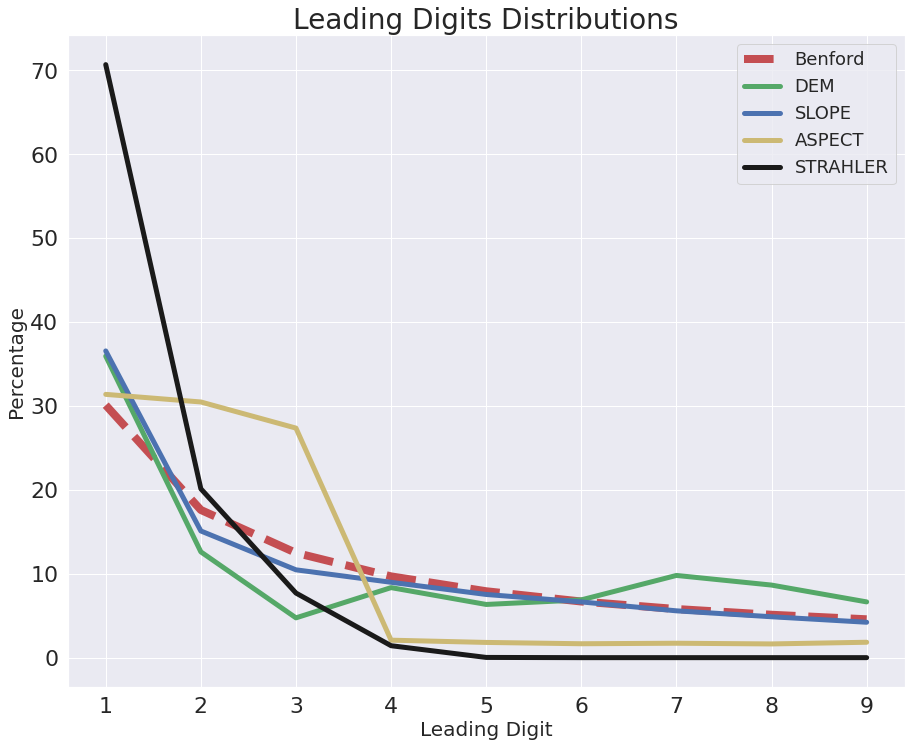

In [11]:
plot_benford4(ff1, ff2, ff3, ff4);

## Régression linéaire du logarithme des distributions


<h2>
Régression linéaire de distribution de Benford du MNT
</h2>


    Slope: -0.1104

    Intercept: 2.7640

    R-squared: -0.5166

    p: 0.1545

    Standrd error: 6.91 %



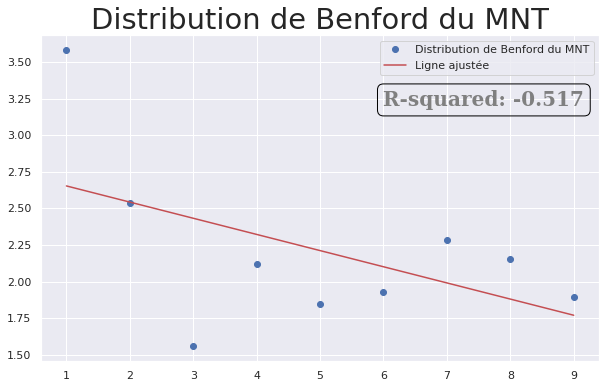

In [12]:
y = np.log(ff1)
slope, intercept, r, p, std_err = stats.linregress(X, y)

printmd(f"""
<h2>
Régression linéaire de distribution de Benford du MNT
</h2>


    Slope: {slope:.4f}\n
    Intercept: {intercept:.4f}\n
    R-squared: {r:.4f}\n
    p: {p:.4f}\n
    Standrd error: {100*std_err:.2f} %

""")
    
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Distribution de Benford du MNT')
plt.plot(X, intercept + slope*X, 'r', label='Ligne ajustée')
plt.legend()
plt.title('Distribution de Benford du MNT', size=29)
plt.text(6, 3.2,  f'R-squared: {r:.3f}', fontdict=font, bbox=box);


<h2>
Régression linéaire de distribution de Benford de la pente
</h2>

    Slope: -0.2264

    Intercept: 3.3007

    R-squared: -0.9310

    p: 0.0003

    Standrd error: 3.35 %


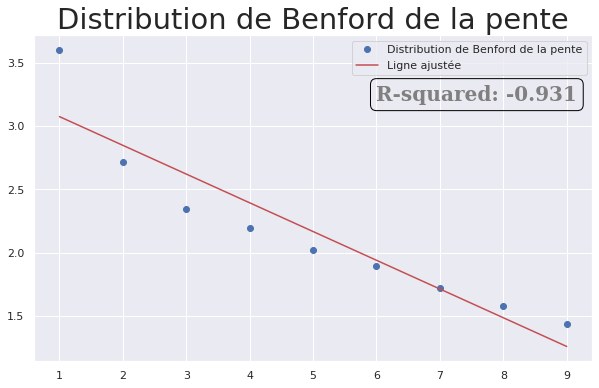

In [13]:
y = np.log(ff2)
slope, intercept, r, p, std_err = stats.linregress(X, y)

printmd(f"""
<h2>
Régression linéaire de distribution de Benford de la pente
</h2>

    Slope: {slope:.4f}\n
    Intercept: {intercept:.4f}\n
    R-squared: {r:.4f}\n
    p: {p:.4f}\n
    Standrd error: {100*std_err:.2f} %
""")
    
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Distribution de Benford de la pente')
plt.plot(X, intercept + slope*X, 'r', label='Ligne ajustée')
plt.legend()
plt.title('Distribution de Benford de la pente', size=29)
plt.text(6, 3.2,  f'R-squared: {r:.3f}', fontdict=font, bbox=box);


<h2>
Régression linéaire de distribution de Benford de l'oreintation
</h2>

    Slope: -0.4314

    Intercept: 3.6743

    R-squared: -0.8394

    p: 0.0047

    Standrd error: 10.56 %


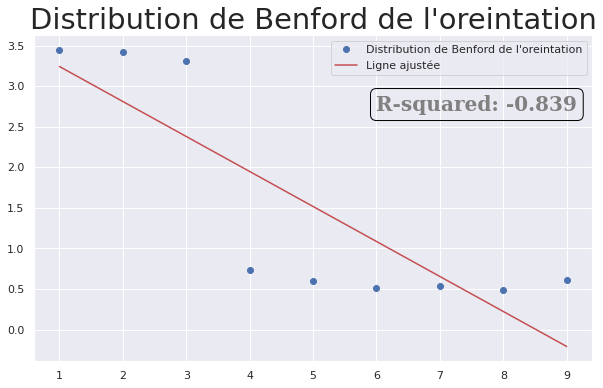

In [14]:
y = np.log(ff3)
slope, intercept, r, p, std_err = stats.linregress(X, y)

printmd(f"""
<h2>
Régression linéaire de distribution de Benford de l'oreintation
</h2>

    Slope: {slope:.4f}\n
    Intercept: {intercept:.4f}\n
    R-squared: {r:.4f}\n
    p: {p:.4f}\n
    Standrd error: {100*std_err:.2f} %
""")
    
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Distribution de Benford de l\'oreintation')
plt.plot(X, intercept + slope*X, 'r', label='Ligne ajustée')
plt.legend()
plt.title('Distribution de Benford de l\'oreintation', size=29)
plt.text(6, 2.7,  f'R-squared: {r:.3f}', fontdict=font, bbox=box);


<h2>
Régression linéaire de distribution de Benford de l'ordre de Strahler
</h2>

    Slope: -1.4980

    Intercept: 5.5295

    R-squared: -0.9457

    p: 0.0001

    Standrd error: 19.45 %


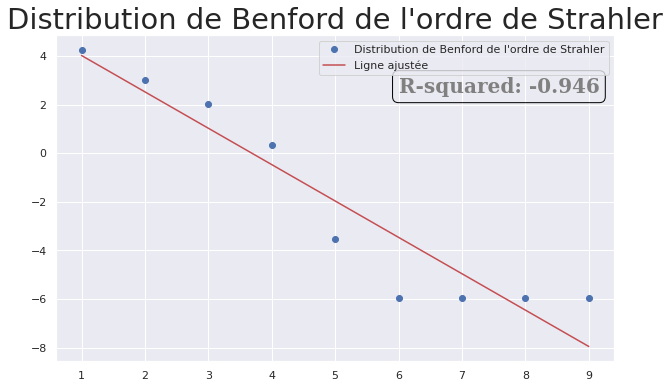

In [15]:
y = np.log(ff4)
slope, intercept, r, p, std_err = stats.linregress(X, y)

printmd(f"""
<h2>
Régression linéaire de distribution de Benford de l'ordre de Strahler
</h2>

    Slope: {slope:.4f}\n
    Intercept: {intercept:.4f}\n
    R-squared: {r:.4f}\n
    p: {p:.4f}\n
    Standrd error: {100*std_err:.2f} %
""")
    
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Distribution de Benford de l\'ordre de Strahler')
plt.plot(X, intercept + slope*X, 'r', label='Ligne ajustée')
plt.legend()
plt.title('Distribution de Benford de l\'ordre de Strahler', size=29)
plt.text(6, 2.5,  f'R-squared: {r:.3f}', fontdict=font, bbox=box);

---


---

# Study case 1: DEM of Carrier (by drone)

In [16]:
# Load DEM
dem1 = rasterio.open('tifs/MNT_carriere.tif')

# Load slope
slp1 = rasterio.open('tifs/MNT_carriere_slope.tif')

# Load aspect 
asp1 = rasterio.open('tifs/MNT_carriere_aspect.tif')

# Load strahler
strhlr = rasterio.open('tifs/MNT_carriere_strahler.tif')

## The raster

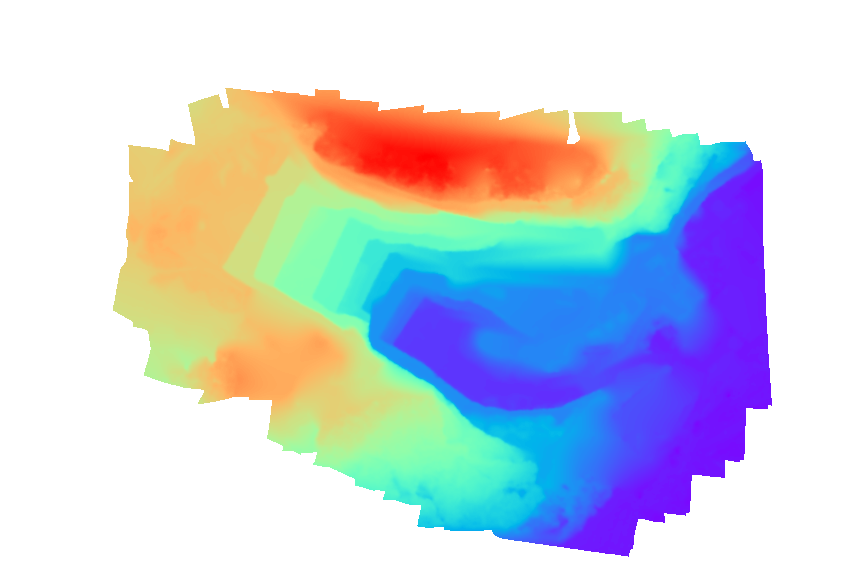

In [17]:
plt.figure(figsize=(15, 12))
plt.axis('off')
show(dem1, cmap='rainbow');

## The histogram

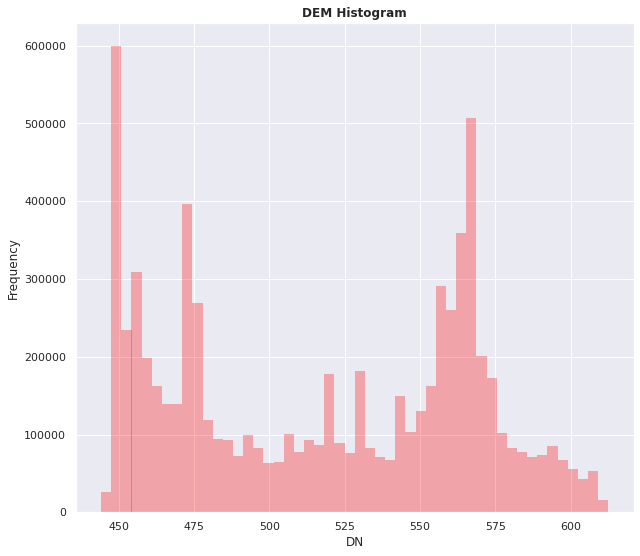

In [18]:
fig, axhist = plt.subplots(1, 1, figsize=(10, 9))

show_hist(dem1, bins=50, lw=0.0, stacked=False, 
          alpha=0.3,
          title="DEM Histogram", ax=axhist)
axhist.get_legend().remove()

In [19]:
 print("\nDEM\n")
 print(dem1.profile)
 print("\nSLOPE\n")
 print(slp1.profile)
 print("\nASPECT\n")
 print(asp1.profile)


DEM

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -32767.0, 'width': 4687, 'height': 3207, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(0.3001530000000024, 0.0, 310946.796760818,
       0.0, -0.3001530000000221, 5170200.44282133), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

SLOPE

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 5339, 'height': 3312, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(0.27658591496535845, 0.0, 769984.0342,
       0.0, -0.3222759057970713, 5173392.36), 'tiled': False, 'interleave': 'band'}

ASPECT

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4687, 'height': 3207, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(0.3001530000000024, 0.0, 310946.796760818,
       0.0, -0.3001530000000221, 5170200.44282133), 'tiled': False, 'interleave': 'band'}


In [20]:
# Reading the first band (not from zero!) of the dem
band1 = dem.read(1).flatten()

f1 = count_leading_digits(band1)

ff1 = frequency_leading_digits(f1)

print_distribution_leading_digits(f1)

digit | frequency
------|----------
    1 |  35.95
    2 |  12.61
    3 |   4.75
    4 |   8.35
    5 |   6.34
    6 |   6.89
    7 |   9.80
    8 |   8.65
    9 |   6.65


In [21]:
# Reading the first band (not from zero!) of the slope
band2 = slp.read(1).flatten() # 2d array

f2 = count_leading_digits(band2)

ff2 = frequency_leading_digits(f2)

print_distribution_leading_digits(f2)

digit | frequency
------|----------
    1 |  36.57
    2 |  15.11
    3 |  10.47
    4 |   8.99
    5 |   7.53
    6 |   6.65
    7 |   5.58
    8 |   4.88
    9 |   4.22


In [22]:
# Reading the first band (not from zero!) of the aspect
band3 = asp.read(1).flatten() # 2d array

f3 = count_leading_digits(band3)

ff3 = frequency_leading_digits(f3)

print_distribution_leading_digits(f3)

digit | frequency
------|----------
    1 |  31.39
    2 |  30.48
    3 |  27.37
    4 |   2.08
    5 |   1.82
    6 |   1.66
    7 |   1.72
    8 |   1.64
    9 |   1.84


In [23]:
# Reading the first band (not from zero!) of the aspect
band4 = strhlr.read(1).flatten() # 2d array

f4 = count_leading_digits(band4)

ff4 = frequency_leading_digits(f4)

print_distribution_leading_digits(f4)

digit | frequency
------|----------
    1 |  79.55
    2 |  14.74
    3 |   3.88
    4 |   1.26
    5 |   0.46
    6 |   0.10
    7 |   0.01
    8 |   0.00
    9 |   0.00


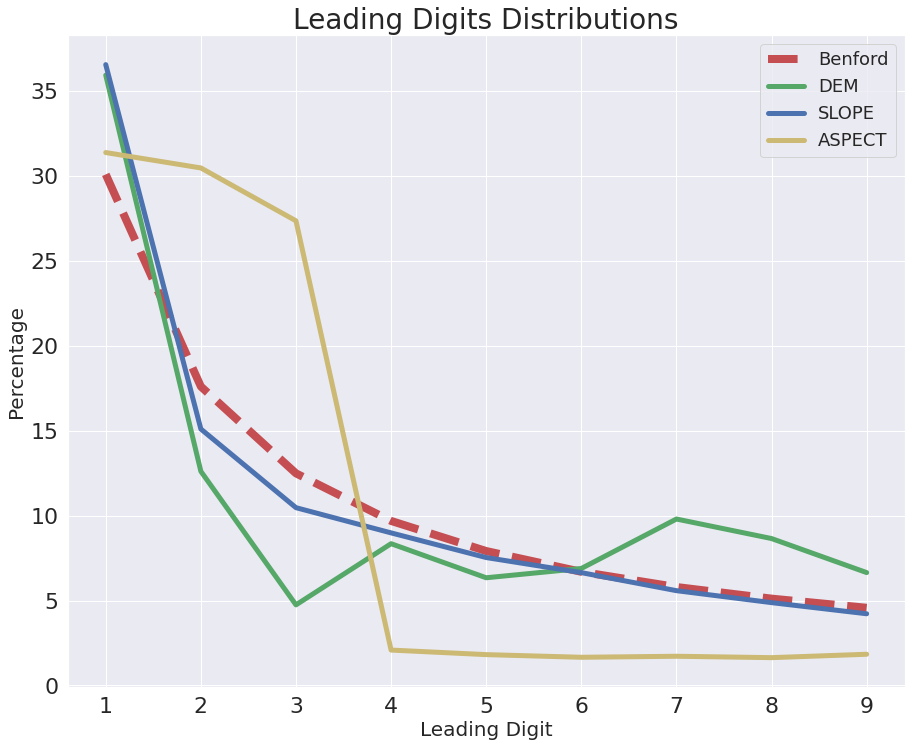

In [24]:
plot_benford(ff1, ff2, ff3);

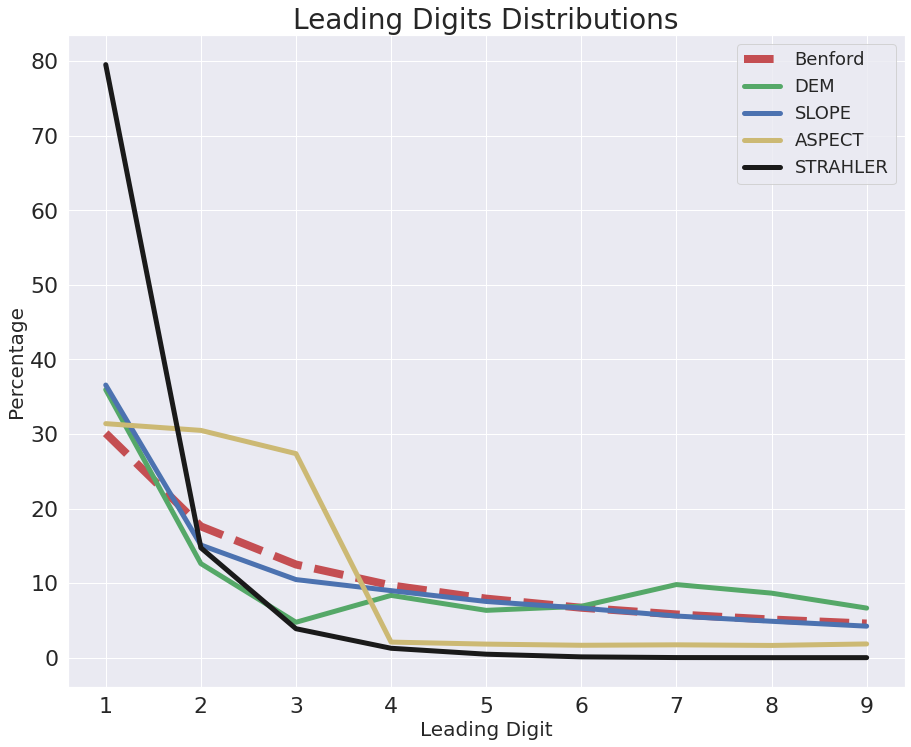

In [25]:
plot_benford4(ff1, ff2, ff3, ff4);

## Régression linéaire du logarithme des distributions


<h2>
Régression linéaire de distribution de Benford du MNT
</h2>


    Slope: -0.1104

    Intercept: 2.7640

    R-squared: -0.5166

    p: 0.1545

    Standrd error: 6.91 %



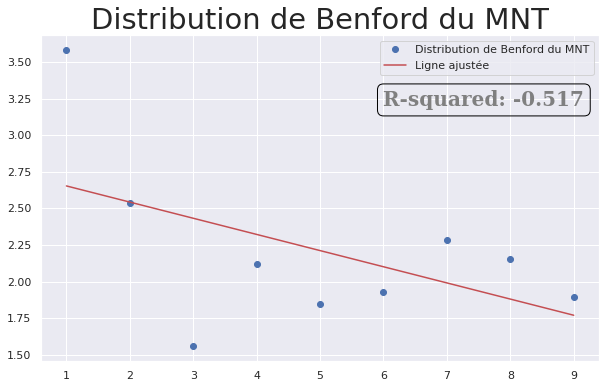

In [26]:
y = np.log(ff1)
slope, intercept, r, p, std_err = stats.linregress(X, y)

printmd(f"""
<h2>
Régression linéaire de distribution de Benford du MNT
</h2>


    Slope: {slope:.4f}\n
    Intercept: {intercept:.4f}\n
    R-squared: {r:.4f}\n
    p: {p:.4f}\n
    Standrd error: {100*std_err:.2f} %

""")
    
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Distribution de Benford du MNT')
plt.plot(X, intercept + slope*X, 'r', label='Ligne ajustée')
plt.legend()
plt.title('Distribution de Benford du MNT', size=29)
plt.text(6, 3.2,  f'R-squared: {r:.3f}', fontdict=font, bbox=box);


<h2>
Régression linéaire de distribution de Benford de la pente
</h2>

    Slope: -0.2264

    Intercept: 3.3007

    R-squared: -0.9310

    p: 0.0003

    Standrd error: 3.35 %


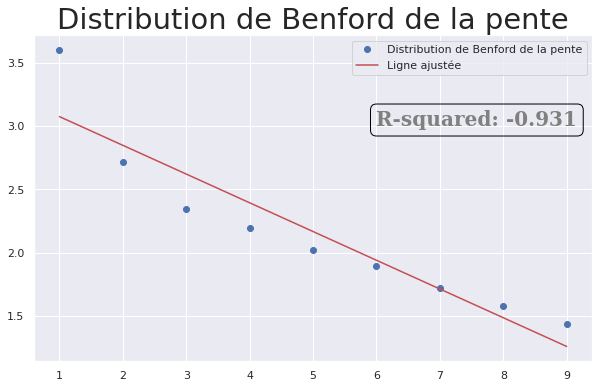

In [27]:
y = np.log(ff2)
slope, intercept, r, p, std_err = stats.linregress(X, y)

printmd(f"""
<h2>
Régression linéaire de distribution de Benford de la pente
</h2>

    Slope: {slope:.4f}\n
    Intercept: {intercept:.4f}\n
    R-squared: {r:.4f}\n
    p: {p:.4f}\n
    Standrd error: {100*std_err:.2f} %
""")
    
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Distribution de Benford de la pente')
plt.plot(X, intercept + slope*X, 'r', label='Ligne ajustée')
plt.legend()
plt.title('Distribution de Benford de la pente', size=29)
plt.text(6, 3,  f'R-squared: {r:.3f}', fontdict=font, bbox=box);


<h2>
Régression linéaire de distribution de Benford de l'oreintation
</h2>

    Slope: -0.4314

    Intercept: 3.6743

    R-squared: -0.8394

    p: 0.0047

    Standrd error: 10.56 %


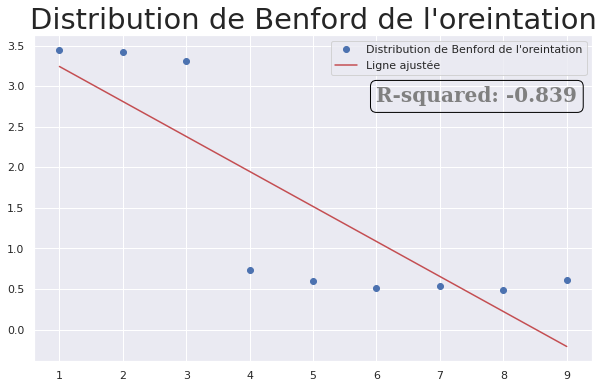

In [28]:
y = np.log(ff3)
slope, intercept, r, p, std_err = stats.linregress(X, y)

printmd(f"""
<h2>
Régression linéaire de distribution de Benford de l'oreintation
</h2>

    Slope: {slope:.4f}\n
    Intercept: {intercept:.4f}\n
    R-squared: {r:.4f}\n
    p: {p:.4f}\n
    Standrd error: {100*std_err:.2f} %
""")
    
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Distribution de Benford de l\'oreintation')
plt.plot(X, intercept + slope*X, 'r', label='Ligne ajustée')
plt.legend()
plt.title('Distribution de Benford de l\'oreintation', size=29)
plt.text(6, 2.8,  f'R-squared: {r:.3f}', fontdict=font, bbox=box);


<h2>
Régression linéaire de distribution de Benford de l'ordre de Strahler
</h2>

    Slope: -1.8402

    Intercept: 7.1260

    R-squared: -0.9717

    p: 0.0000

    Standrd error: 16.92 %


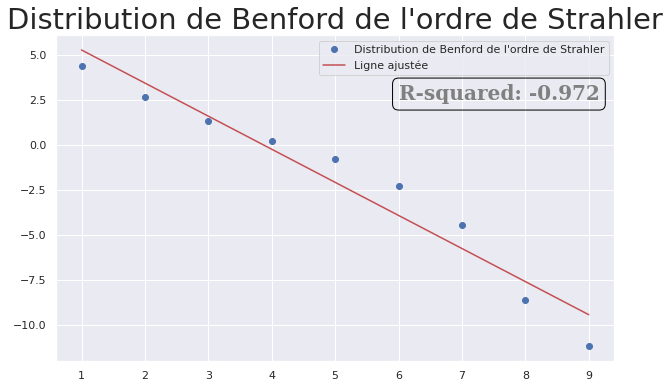

In [29]:
y = np.log(ff4)
slope, intercept, r, p, std_err = stats.linregress(X, y)

printmd(f"""
<h2>
Régression linéaire de distribution de Benford de l'ordre de Strahler
</h2>

    Slope: {slope:.4f}\n
    Intercept: {intercept:.4f}\n
    R-squared: {r:.4f}\n
    p: {p:.4f}\n
    Standrd error: {100*std_err:.2f} %
""")
    
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'o', label='Distribution de Benford de l\'ordre de Strahler')
plt.plot(X, intercept + slope*X, 'r', label='Ligne ajustée')
plt.legend()
plt.title('Distribution de Benford de l\'ordre de Strahler', size=29)
plt.text(6, 2.5,  f'R-squared: {r:.3f}', fontdict=font, bbox=box);

---


---

## References:

**Polidori, Laurent & El Hage, Mhamad. (2019).**
___Application de la loi de Benford au contrôle de qualité des modèles numériques de terrain. 19 - 22.___ 

[Application de la loi de Benford au contrôle de qualité des modèles numériques de terrain](https://www.researchgate.net/publication/331580669_Application_de_la_loi_de_Benford_au_controle_de_qualite_des_modeles_numeriques_de_terrain)*

La loi de Benford fait le constat empirique d'une régularité dans la distribution statistique du premier chiffre dans de nombreuses séries de nombres (géographie, sport, économie etc.). Elle a été utilisée pour détecter des fraudes comptables ou électorales. Dans le même esprit, nous avons cherché à l'utiliser comme critère de vraisemblance pour évaluer la qualité des modèles numériques de terrain. Les métriques considérées sont l'altitude, la pente et l'ordre de Strahler.

**Wikipedia Benford's law**

https://www.wikiwand.com/en/Benford%27s_law